# Import Required Libraries
Import the necessary libraries, including NumPy, Matplotlib, and PySINDy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps

# Define Lorenz System
Define the Lorenz system of differential equations.

In [2]:
# Define Lorenz System
def lorenz(X, t, sigma=10, rho=28, beta=8/3):
    x, y, z = X
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])

# Runge-Kutta 4th Order Method
Implement the Runge-Kutta 4th order method for solving differential equations.

In [3]:
def rk4_step(func, X, t, dt, sigma=10, rho=28, beta=8/3):
    k1 = func(X, t, sigma, rho, beta)
    k2 = func(X + 0.5 * dt * k1, t + 0.5 * dt, sigma, rho, beta)
    k3 = func(X + 0.5 * dt * k2, t + 0.5 * dt, sigma, rho, beta)
    k4 = func(X + dt * k3, t + dt, sigma, rho, beta)
    return X + (dt / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

# Simulate Lorenz System
Simulate the Lorenz system using the Runge-Kutta method.

In [4]:
# Parameters
sigma = 10
rho = 28
beta = 8 / 3
dt = 0.01
t_max = 50

# Initial conditions
X0 = np.array([1.0, 1.0, 1.0])

# Time array
t = np.arange(0, t_max, dt)

# Initialize array to store the solution
X = np.zeros((len(t), 3))
X[0] = X0

# Simulate the Lorenz system using the Runge-Kutta method
for i in range(1, len(t)):
    X[i] = rk4_step(lorenz, X[i-1], t[i-1], dt, sigma, rho, beta)

# Visualize Lorenz Attractor
Visualize the Lorenz attractor using Matplotlib.

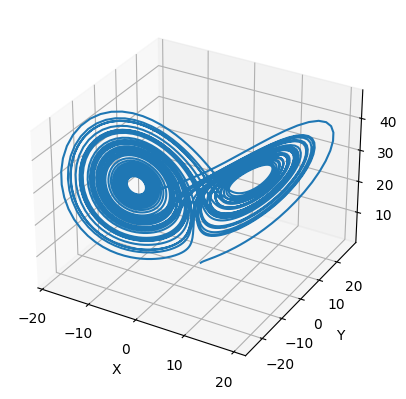

In [6]:
# Visualize Lorenz Attractor

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# PySINDy Model
Initialize the PySINDy model.

In [7]:
# PySINDy Model
# Initialize the PySINDy model
model = ps.SINDy()

# Fit the model to the simulated Lorenz system data
model.fit(X, t=dt)

# Print the discovered equations
model.print()

(x0)' = -9.977 x0 + 9.977 x1
(x1)' = 27.804 x0 + -0.962 x1 + -0.994 x0 x2
(x2)' = -2.659 x2 + 0.997 x0 x1


# Predict Using PySINDy Model
Use the PySINDy model to predict the Lorenz system equations.

In [9]:
# Predict the Lorenz system using the PySINDy model
X_pred = model.simulate(X0, t)

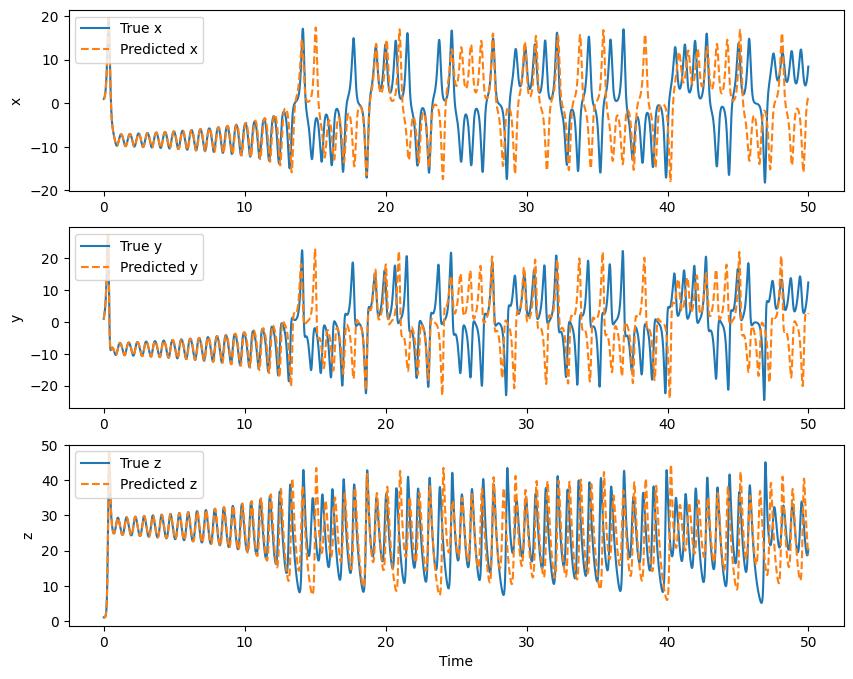

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

axs[0].plot(t, X[:, 0], label='True x')
axs[0].plot(t, X_pred[:, 0], label='Predicted x', linestyle='--')
axs[0].set_ylabel('x')
axs[0].legend()

axs[1].plot(t, X[:, 1], label='True y')
axs[1].plot(t, X_pred[:, 1], label='Predicted y', linestyle='--')
axs[1].set_ylabel('y')
axs[1].legend()

axs[2].plot(t, X[:, 2], label='True z')
axs[2].plot(t, X_pred[:, 2], label='Predicted z', linestyle='--')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('z')
axs[2].legend()

plt.show()

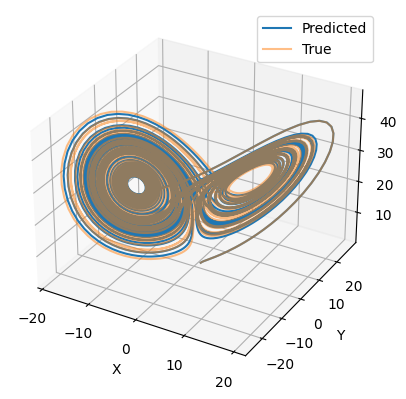

In [12]:
# Plot the predicted results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X_pred[:, 0], X_pred[:, 1], X_pred[:, 2], label='Predicted')
ax.plot(X[:, 0], X[:, 1], X[:, 2], label='True', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()